In [1]:
### IMPORT SCIENTIFIC LIBRARIES ###
import numpy as np
import pandas as pd
from scipy import sparse

import matplotlib.pyplot as plt
plt.rcParams['font.size'], plt.rcParams['axes.labelsize'] = 14, 18
import sys, importlib

import h5py
import hdf5plugin

import sys
sys.path.append('./XPCSlibrary/')

import ID10_tools as ID10
from ID10_tools import Nx, Ny, Npx
importlib.reload(ID10)
ID10.set_version('v2')

import XPCS_tools as XPCS
from XPCS_tools import E2lambda, lambda2E, theta2Q, Q2theta, decorrelation_f
importlib.reload(XPCS)
XPCS.set_beamline('ID10')

import COSMICRAY_tools as COSMIC
importlib.reload(COSMIC)
COSMIC.set_beamline('ID10')

### EXPERIMENTAL VARIABLES ###
XPCS.set_expvar(1350, 1350, 7)
ID10.Nfmax_dense_file = 2000
ID10.Nfmax_sparse_file = 5000

from folder_paths import *

## Load masks

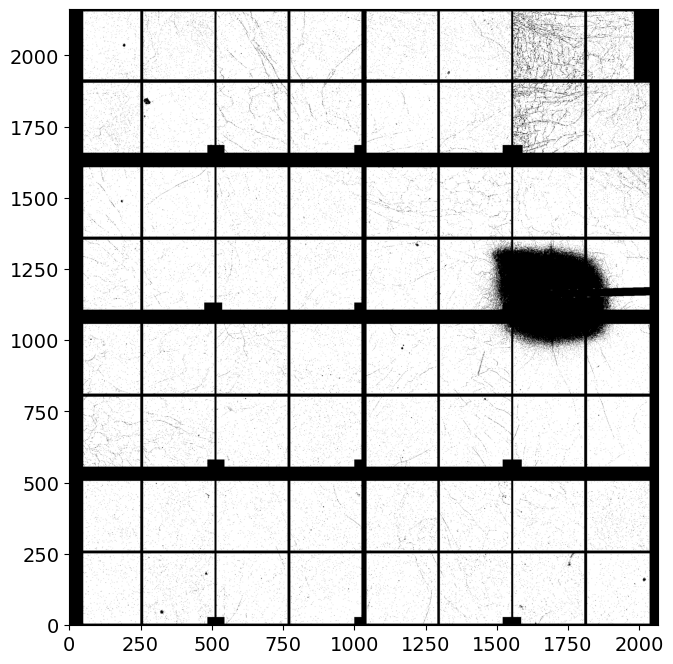

In [2]:
e4m_htmask = np.load(MASKS_folder_test+'e4m_htmask_copper_foil_30um_1_1'+'.npy')
e4m_mask = np.load(MASKS_folder_test+'e4m_mask'+'.npy')

plt.figure(figsize=(8, 8))
plt.imshow((e4m_mask*e4m_htmask).reshape(Nx,Ny), cmap='gray', origin='lower')

## BS mask and Q definition
Using a random scan in GeO2_6, because we are not changing the measurement configuration

### Beamstop mask

In [3]:


#######################################
sample_name = 'GeO2_6'
Ndataset = 1
Nscan =12
Nfi, Nff = 0, 1000
#######################################

scan = ID10.load_scan(RAW_folder_test, sample_name, Ndataset, Nscan)
Ei = scan['monoe']
itime = scan['fast_timer_period'][0]
theta = scan['delcoup']
Q = round(XPCS.theta2Q(Ei,  theta),2)

print('#############################')
print('command =', scan['command'])
print('Ei =', Ei)
print('itime =', itime)
print('theta =', theta)
print('Q =', Q)
print('#############################\n')

e4m_data = ID10.load_sparse_e4m(RAW_folder_test, sample_name, Ndataset, Nscan, Nfi, Nff,  n_jobs=1, )

#############################
command = mtimescan 0.02 1 220000
Ei = 9.699998837562536
itime = 0.0201
theta = 1.7500000000000004
Q = 0.15
#############################

Loading sparse array ...
	 -> loading file eiger4m_v2_sparse_frame_0_00000.h5 (1/1 loops)
Done! (elapsed time = 0.32 s)
Concatenating vectors ...
Done! (elapsed time = 0.02 s)
	 | Sparse array loaded from /data/visitor/hc6209/id10-coh/20250408/RAW_DATA/GeO2_6/GeO2_6_0001/scan0012/
	 | Shape:       (1000, 4471016)
	 | Sparsity:     3.8e-03
	 | Memory usage (scipy.csr_array): 0.192 GB (np.array usage: 16.656 GB)


################################################################################
Maximum count in the hull run -> 4689.0
# of pixels above Ith_high treshold ->  75 pixels (of 4471016 => 0.0 %)
################################################################################



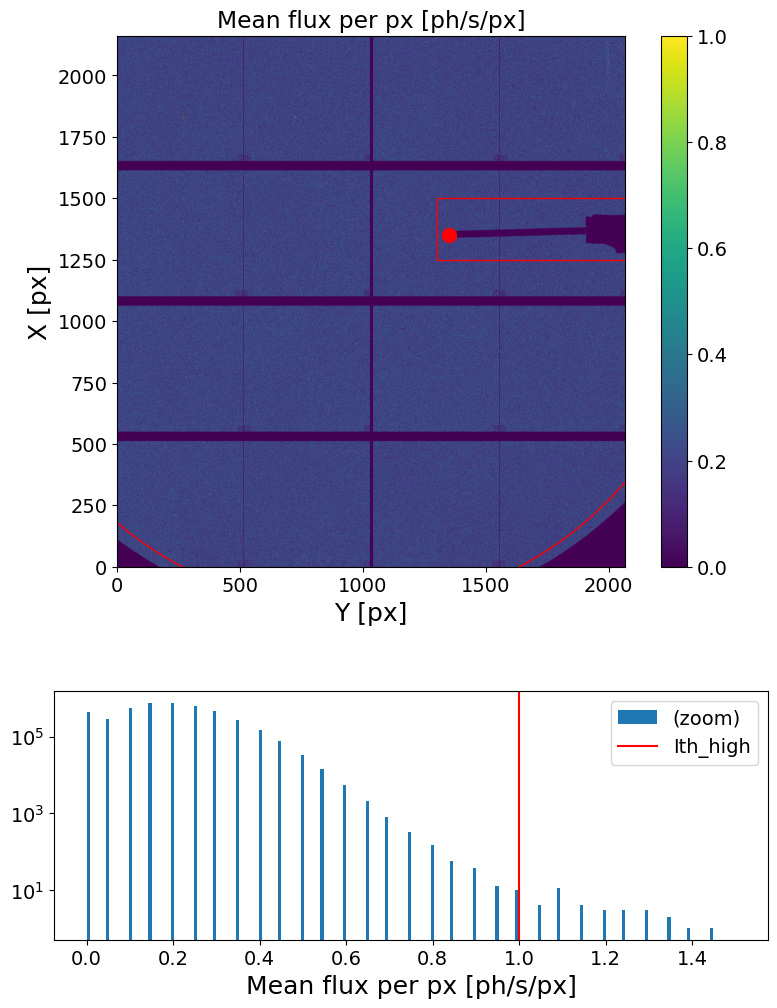

#################################################
Masked area =  93.74594052000708 %
#################################################



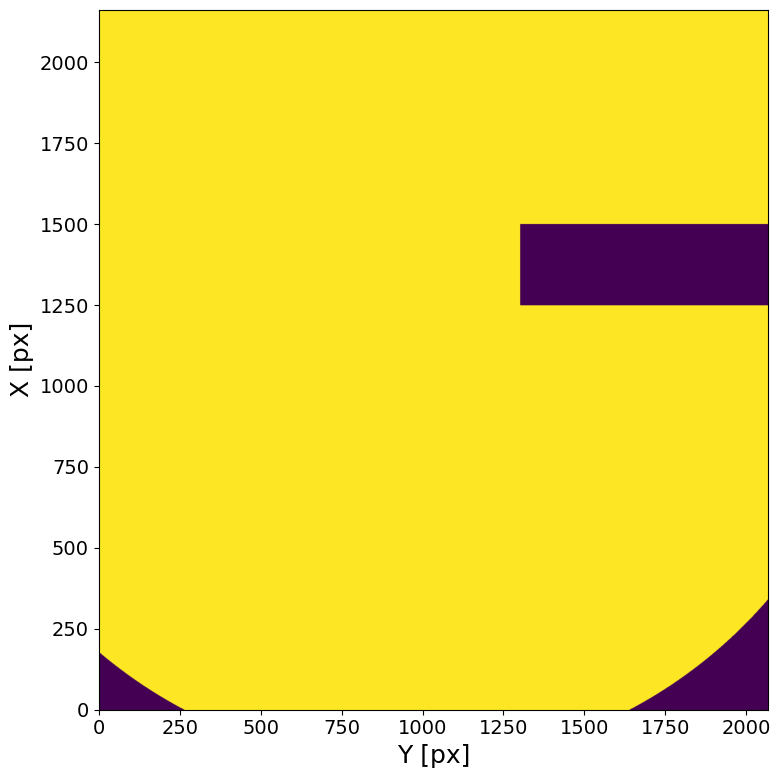

In [4]:
geom = [{'geom':'Rectangle', 'x0':1250, 'y0':1300, 'xl':250, 'yl':1950, 'inside':False},
        {'geom':'Circle', 'Cx':1300, 'Cy':950, 'r':1470, 'inside':True}, 
        ]
XPCS.gen_plots4mask(e4m_data, itime, Ith_high=1, Nff=10000, mask_geom=geom,)

bs_mask = XPCS.gen_mask(e4m_data, itime, mask=None, mask_geom=geom)

### Q mask

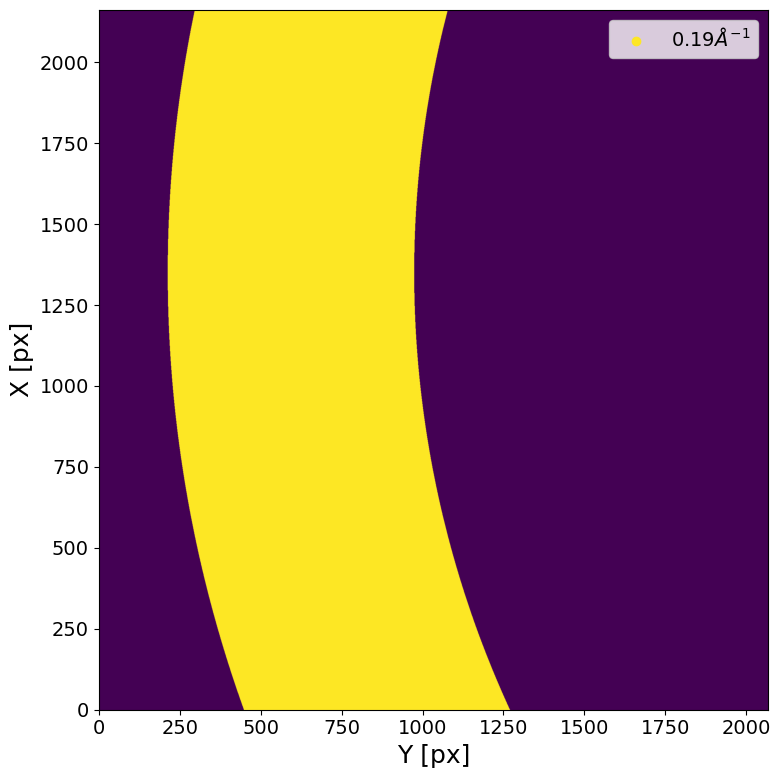

In [5]:
Qmask = XPCS.gen_Qmask(Ei, theta, .19, .02, Qmap_plot=False)

## XPCS scan (T = 30C Q = 0.19 Å, 5 min @ 1ms (300_000 fm)) (GeO2_3_test, dataset 1, scan 1)

In [6]:
#######################################
sample_name = 'GeO2_3_alligment'
Ndataset = 1
Nscan = 6
Nfi, Nff =  None, None
#######################################

scan = ID10.load_scan(RAW_folder_test, sample_name, Ndataset, Nscan)
Ei = scan['monoe']
itime = scan['fast_timer_period'][0]
theta = scan['delcoup']
Q = round(XPCS.theta2Q(Ei,  theta),2)

print('#############################')
print('command =', scan['command'])
print('Ei =', Ei)
print('itime =', itime)
print('theta =', theta)
print('Q =', Q)
print('#############################\n')

e4m_data = ID10.load_sparse_e4m(RAW_folder_test, sample_name, Ndataset, Nscan, Nfi, Nff,  n_jobs=1, )

e4m_data = COSMIC.fast_gamma_filter(e4m_data, Imaxth_high=5)

#############################
command = mtimescan 0.001 1 300048
Ei = 9.699998837562536
itime = 0.0011
theta = 1.7500000000000004
Q = 0.15
#############################

Loading sparse array ...
	 -> loading file eiger4m_v2_sparse_frame_0_00000.h5 (1/61 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00001.h5 (2/61 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00002.h5 (3/61 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00003.h5 (4/61 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00004.h5 (5/61 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00005.h5 (6/61 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00006.h5 (7/61 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00007.h5 (8/61 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00008.h5 (9/61 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00009.h5 (10/61 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00010.h5 (11/61 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00011.h5 (12/61 loops)
	 -> loadi

### Correlation

In [7]:
###################
Nfi = 100_000
Nff = 500_000
Lbin = 5
mask = e4m_mask * e4m_htmask * bs_mask * Qmask
###################
if Lbin is None: Lbin=1

G2t = XPCS.get_G2t(e4m_data, mask=mask, Nfi=Nfi, Nff=Nff, Lbin=Lbin)

Loading frames ...
Done! (elapsed time = 1.63 s)
Binning frames (Lbin = 5, using MKL library) ...
Done! (elapsed time = 2.54 s)
	 | 40009 frames X 4471016 pixels
	 | sparsity = 1.09e-03
	 | memory usage (sparse.csr_array @ float32) = 1.452 GB
Masking data ...
Done! (elapsed time = 2.08 s)
	 | 40009 frames X 1427140 pixels
	 | sparsity = 1.19e-03
	 | memory usage (sparse.csr_array @ float32) = 0.507 GB
Computing G2t (using MKL library)...
Done! (elapsed time = 2.01 s)
	 | 40009 X 40009 squared matrix
	 | memory usage (np.array @ float32) = 5.963 GB
Normalizing G2t (using NumExpr library)...
Done! (elapsed time = 0.94 s)



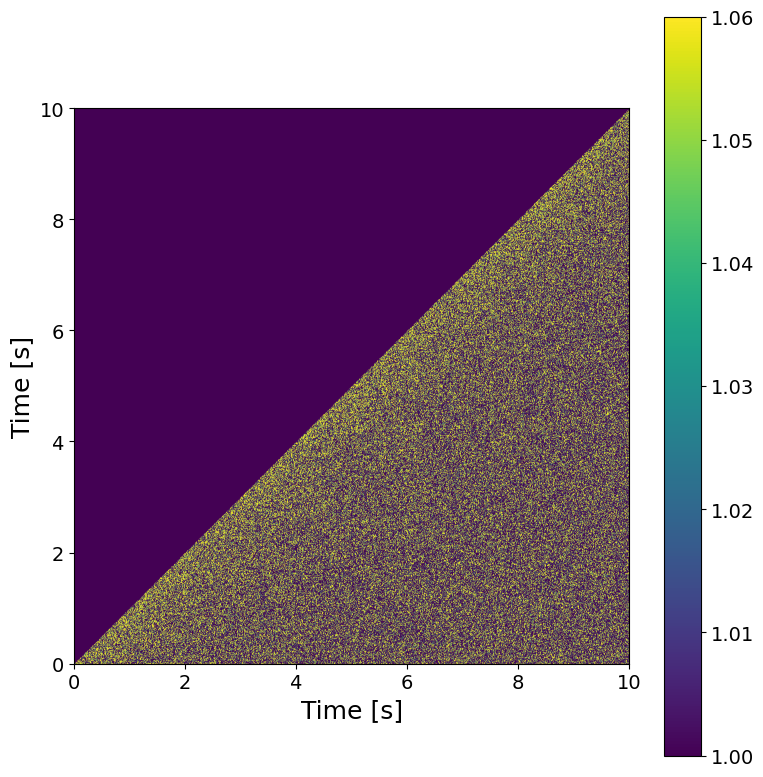

In [8]:
############################
t1, t2 = 0, 10
vmin, vmax = 1.0, 1.06
############################
XPCS.plot_G2t(G2t, vmin, vmax, itime=itime, t1=t1, t2=t2, sigma_filter=3)

In [9]:
################
Nbunch = 1
################

NfXbunch = int(G2t.shape[0]/Nbunch)
t, g2, t_mt, g2_mt = {}, {}, {}, {}
for n in range(Nbunch):
    t_bunch = round(itime*Lbin*NfXbunch*(n+1/2),1)

    t[t_bunch], g2[t_bunch] = XPCS.get_g2(itime*Lbin, np.array(G2t[NfXbunch*n:NfXbunch*(n+1), NfXbunch*n:NfXbunch*(n+1)]), cython=False)
    t_mt[t_bunch], g2_mt[t_bunch] = XPCS.get_g2mt_fromling2(itime*Lbin, g2[t_bunch])    

Computing g2...
Done! (elapsed time = 1.1 s)



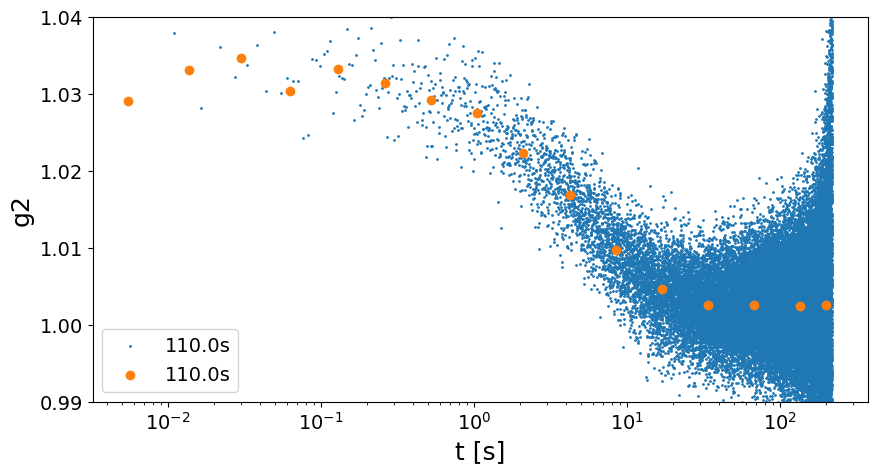

In [10]:


##################
t1_fit = 0
t2_fit = 1e8
##################
 
plt.figure(figsize=(10,5))
fit_out = pd.DataFrame(columns=['tau', 'beta', 'c', 'y0', 'dtau', 'dbeta', 'dc', 'dy0'])
fit_out.index.name = 't'
for k in g2.keys():
    plt.scatter(t[k], g2[k], s=1, label = str(k)+'s')
    plt.scatter(t_mt[k], g2_mt[k], label=str(k)+'s')

plt.xlabel('t [s]')
plt.ylabel('g2')
plt.xscale('log')
plt.ylim(0.99, 1.04)
plt.legend()
plt.show()


## XPCS scan (T = 695C Q =  0.19 Å, 240 min @ 1ms (14_400_000fm)) (GeO2_7, dataset 1, scan 4)

In [11]:
#######################################
sample_name = 'GeO2_7_695C'
Ndataset = 1
Nscan = 4
Nfi, Nff = None, None
load_mask = e4m_mask * e4m_htmask * bs_mask * Qmask
#######################################

scan = ID10.load_scan(RAW_folder_test, sample_name, Ndataset, Nscan)
Ei = scan['monoe']
itime = scan['fast_timer_period'][0]
theta = scan['delcoup']
Q = round(XPCS.theta2Q(Ei,  theta),2)

print('#############################')
print('command =', scan['command'])
print('Ei =', Ei)
print('itime =', itime)
print('theta =', theta)
print('Q =', Q)
print('#############################\n')

e4m_data = ID10.load_sparse_e4m(RAW_folder_test, sample_name, Ndataset, Nscan, Nfi, Nff,  n_jobs=50, load_mask=load_mask)
e4m_data = COSMIC.fast_gamma_filter(e4m_data, Imaxth_high=5)

#############################
command = mtimescan 0.001 1 14399568
Ei = 9.699998837562536
itime = 0.0011
theta = 1.7500000000000004
Q = 0.15
#############################

Loading sparse array ...
	 -> loading file eiger4m_v2_sparse_frame_0_00010.h5 (11/2580 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00024.h5 (25/2580 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00017.h5 (18/2580 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00034.h5 (35/2580 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00000.h5 (1/2580 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00014.h5 (15/2580 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00009.h5 (10/2580 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00007.h5 (8/2580 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00038.h5 (39/2580 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00005.h5 (6/2580 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00023.h5 (24/2580 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_000

### Flux check

################################################################################
Maximum count in the hull run -> 5.0
# of pixels above Ith_high treshold ->  3043891 pixels (of 4471016 => 68.08 %)
################################################################################



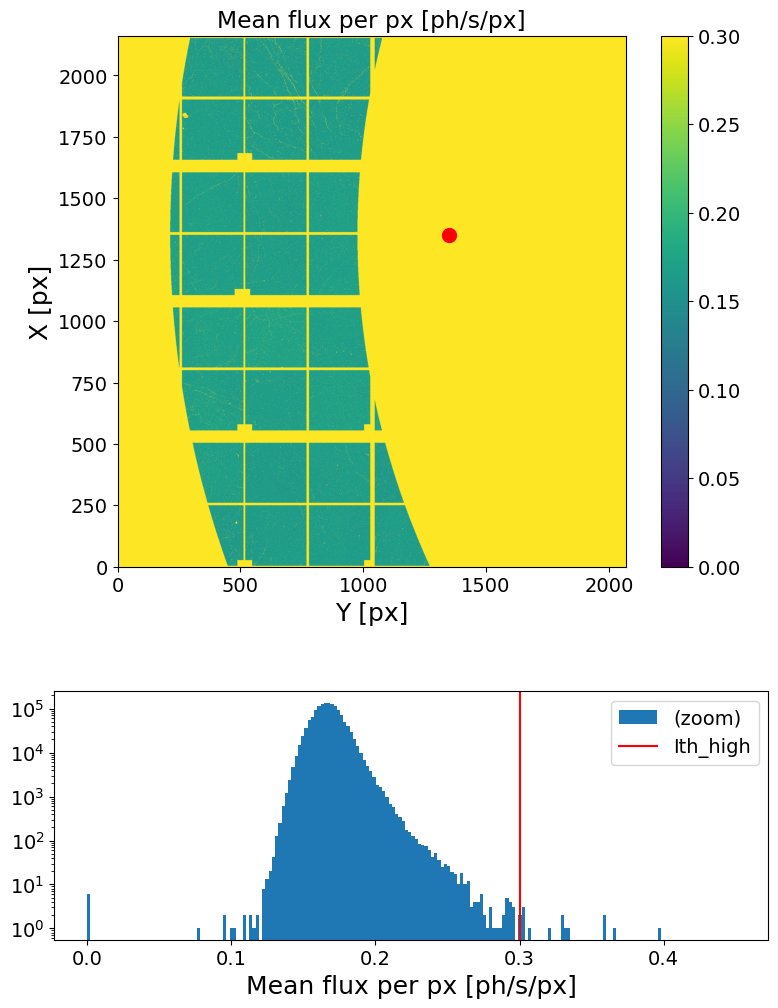

In [12]:
XPCS.gen_plots4mask(e4m_data, itime, Ith_high=.3, Nfi=int(1e6), Nff=int(5e6), load_mask=load_mask)

### Intensity analysis

In [13]:
####################
Lbin = 1
Nstep = 10
mask = None
####################

t_It, It = XPCS.get_It(e4m_data, itime, mask=mask, Lbin=Lbin, Nstep=Nstep)

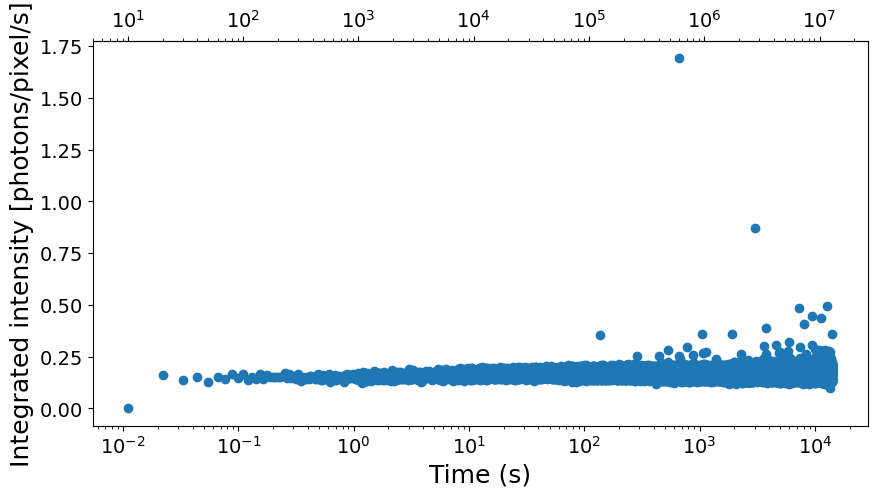

In [14]:
plt.figure(figsize=(10,5))
plt.scatter(t_It, It, label='It')
plt.xlabel('Time (s)')
plt.ylabel('Integrated intensity [photons/pixel/s]')
plt.gca().secondary_xaxis('top', functions=(lambda x: x/itime, lambda x: x*itime))
plt.xscale('log') 

### Correlation

In [15]:
XPCS.print_Nf_choices(scan['fast_timer_trig'].size)

       Nf = 12896068    =>    log2(Nf) = 23.62
----------------------------------------------------
  reduced Nf  dense depth (2^x)  thrown frames %  thrown frames
0      2**23                 22             35.0        4507460
1    3*2**22                 21              2.0         313156
2   49*2**18                 17              0.0          51012
3  393*2**15                 14              0.0          18244
4  787*2**14                 13              0.0           1860
----------------------------------------------------


In [17]:
##### INPUTS #####
Nfi = 40_000
Nff = 40_000 + 3*2**22
sparse_depth = 14
dense_depth = 21
mask = None
##################

G2tmt_1 = XPCS.get_G2tmt_4sparse(e4m_data, sparse_depth, dense_depth, Nfi, Nff, mask=mask)

Loading frames ...
Done! (elapsed time = 32.82 s)
	 | 12582912 frames X 1427140 pixels
	 | sparsity = 1.83e-04
	 | memory usage (sparse.csr_array @ float32) = 36.847 GB
Computing sparse multitau G2t...


100%|██████████| 768/768 [06:24<00:00,  2.00it/s]


Done! (elapsed time = 385.28 s)
Computing dense multitau G2t...


100%|██████████| 7/7 [00:02<00:00,  3.16it/s]

Done! (elapsed time = 2.22 s)


In [ ]:
##### INPUTS #####
Nfi = 40_000
Nff = 40_000 + 3*2**22
sparse_depth = 14
dense_depth = 21
mask = load_mask
##################

G2tmt_2 = XPCS.get_G2tmt_4sparse_bypartialloading(RAW_folder_test, sample_name, Ndataset, Nscan, sparse_depth, dense_depth, Nfi, Nff, mask=mask)

Computing sparse multitau G2t...


Exception ignored in: Exception ignored in: <function ResourceTracker.__del__ at 0x7ef73b083c40>
Traceback (most recent call last):
  File "/data/visitor/hc6211/id10-coh/20250527/miniconda3/envs/XPCSenv_test/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
<function _afterFork at 0x74d7413a1260>
Traceback (most recent call last):
  File "/data/visitor/hc6211/id10-coh/20250527/miniconda3/envs/XPCSenv_test/lib/python3.13/logging/__init__.py", line 245, in _afterFork
  File "/data/visitor/hc6211/id10-coh/20250527/miniconda3/envs/XPCSenv_test/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
Exception ignored in: Exception ignored in: <function ResourceTracker.__del__ at 0x7785aa73bc40>  File "/data/visitor/hc6211/id10-coh/20250527/miniconda3/envs/XPCSenv_test/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked

Traceback (most recent call last):
  File "/data/visitor/hc6211/id10-coh/20250527/miniconda3/envs/XPCSenv_te

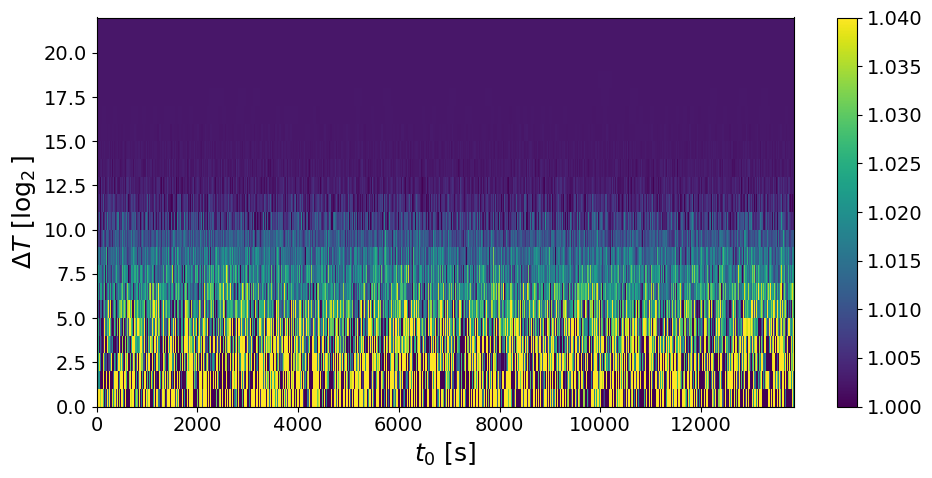

In [ ]:
############################
vmin, vmax = 1.0, 1.04
lower_mt = 6
filter_layer = 10
############################

XPCS.plot_G2tmt(G2tmt_1, itime, vmin, vmax, yscale='log2', lower_mt=lower_mt, filter_layer=filter_layer)
#XPCS.plot_G2tmt(G2tmt_2, itime, vmin, vmax, yscale='log2', lower_mt=lower_mt, filter_layer=filter_layer)

In [ ]:
t_mt_1, g2_mt_1, dg2_mt_1 = XPCS.get_g2mt(itime, G2tmt_1)
#t_mt_2, g2_mt_2, dg2_mt_2 = XPCS.get_g2mt(itime, G2tmt_2)

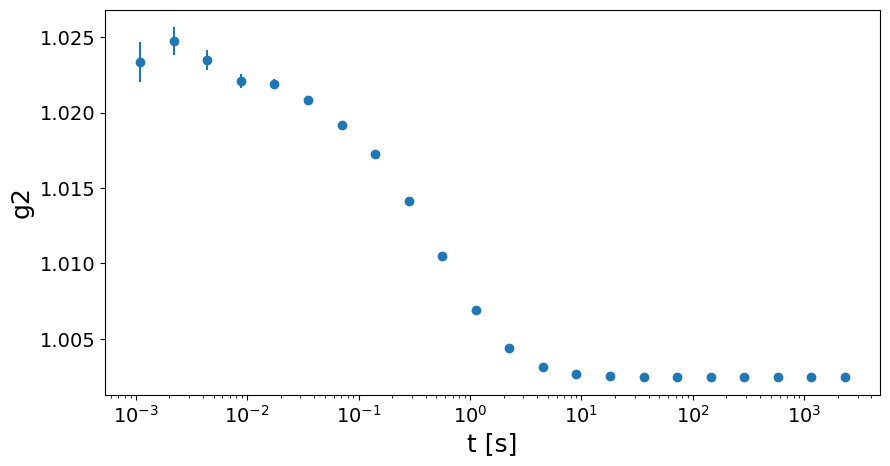

In [ ]:
plt.figure(figsize=(10,5))
fit_out = pd.DataFrame(columns=['tau', 'beta', 'c', 'y0', 'dtau', 'dbeta', 'dc', 'dy0'])
fit_out.index.name = 't'

plt.errorbar(t_mt_1, g2_mt_1, yerr=dg2_mt_1, fmt='o', label='g2')
#plt.errorbar(t_mt_2, g2_mt_2, yerr=dg2_mt_2, fmt='o', label='g2 (bypartialloading)')

plt.xlabel('t [s]')
plt.ylabel('g2')
plt.xscale('log')
#plt.legend()
plt.show()
